In [33]:
%matplotlib inline
%run source/admin_garmin
%run source/admin_axes
%run source/admin_header
%run source/admin_segments
%run source/user_functions
import warnings
warnings.filterwarnings('ignore')
print ("Input file is (full path)  ", input_file_path)

Input file is (full path)   /opt/jupyter/data/csv/activity_898238015_30.csv


In [34]:
df.head()

,altitude,cadence,distance,heart_rate,latitude,longitude,time_diff,breaks,distance_diff,speed,moving
time,,,,,,,,,,,
2015-09-13 07:25:51+01:00,79.400002,76,5.010,103,53.363708,-6.190183,1,False,0.000,0.0000,False
2015-09-13 07:25:52+01:00,81.680002,77,9.626,104,53.363718,-6.190250,0,False,4.616,0.0000,False
2015-09-13 07:25:53+01:00,83.960002,79,14.242,104,53.363729,-6.190317,0,False,4.616,11.0784,True
2015-09-13 07:25:54+01:00,86.240002,80,18.858,105,53.363740,-6.190384,0,False,4.616,16.6176,True
2015-09-13 07:25:55+01:00,88.520003,82,23.474,105,53.363750,-6.190451,0,False,4.616,16.6176,True


## Basic Data Analytics
Provided by the major fitness websites.    
Sames basic analytics provided to all athletes, irrespective of their level of performance.    
Analytics provided at the summary level over the full duration of the activity.    

## Break Out by Sessions
Use TimeLine Summary view to identify Sessions

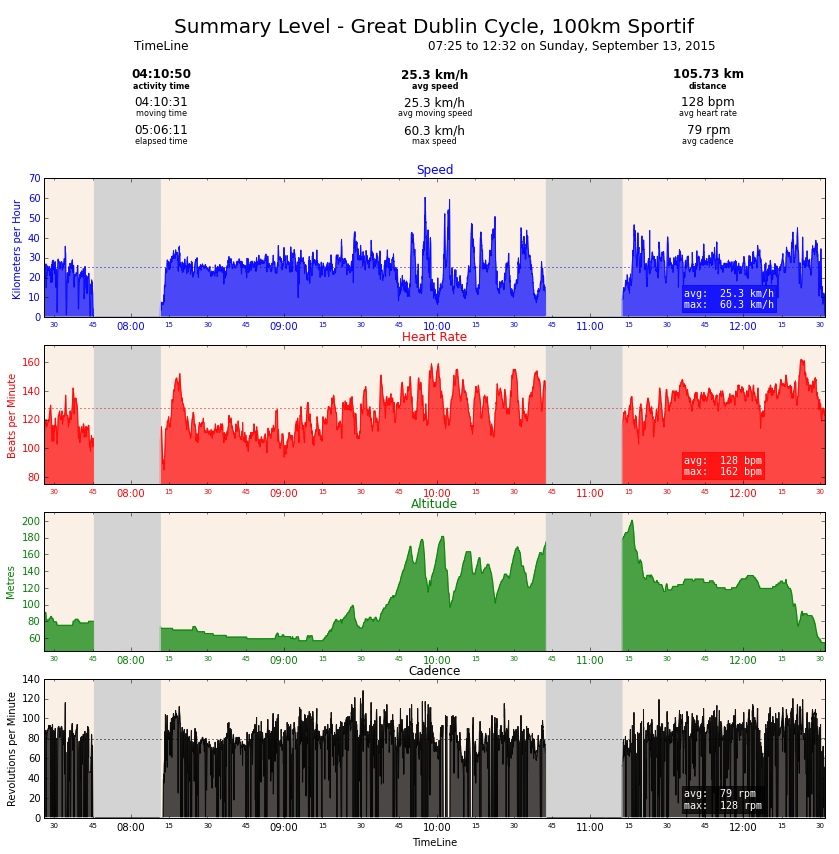

In [55]:
#view_type = 'distance'
view_type = 'timeline'
summary_view(view_type)

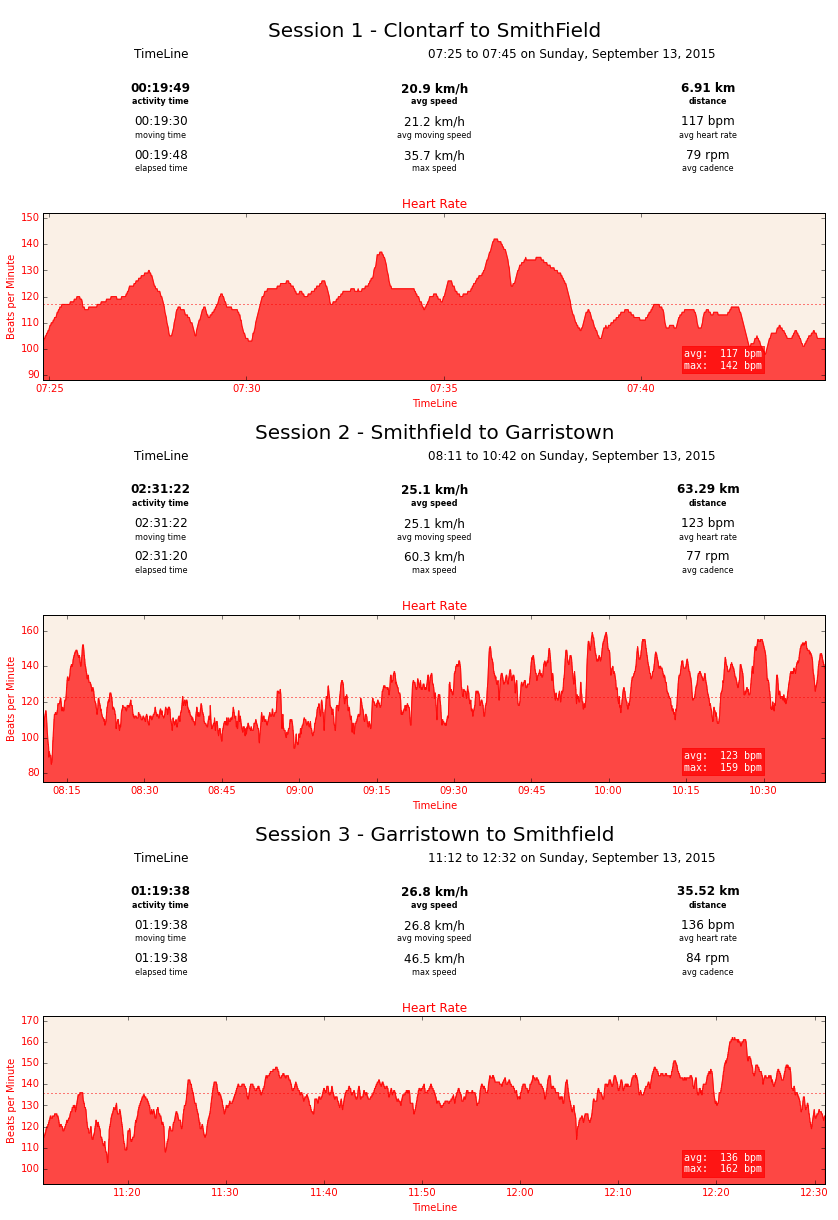

In [45]:
view_type = 'timeline2'

#column_name = 'speed'
column_name = 'heart_rate'

session_overview(view_type, column_name)

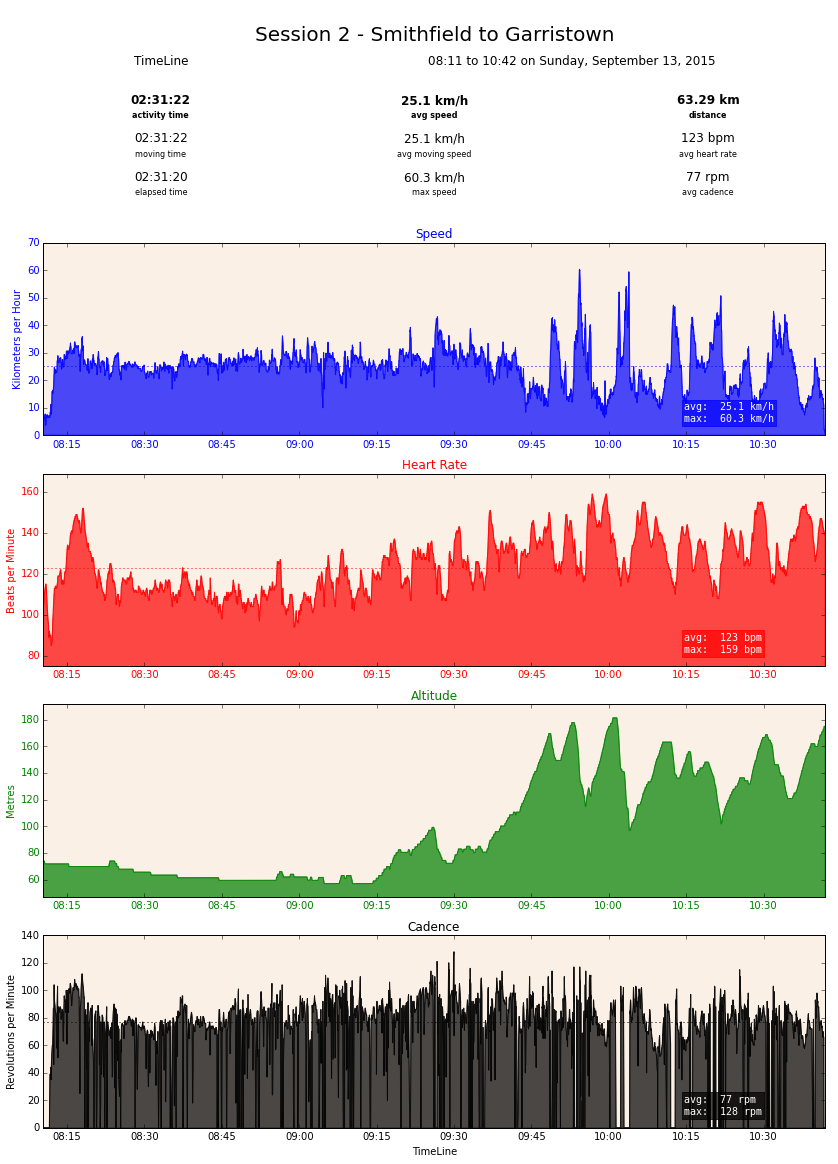

In [38]:
view_type = 'timeline2'

session_num = 2

session_detail(view_type, session_num)

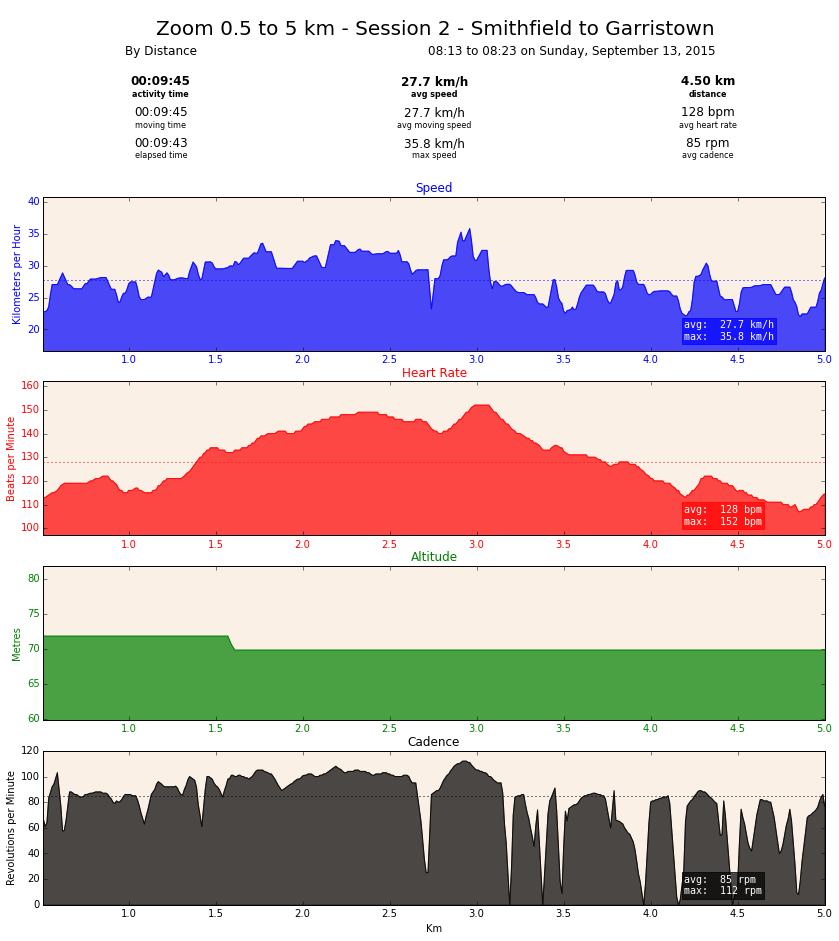

In [56]:
view_type = 'distance'
session_num = 2
start_value = .5
end_value = 5

session_zoom(view_type, session_num, start_value, end_value)

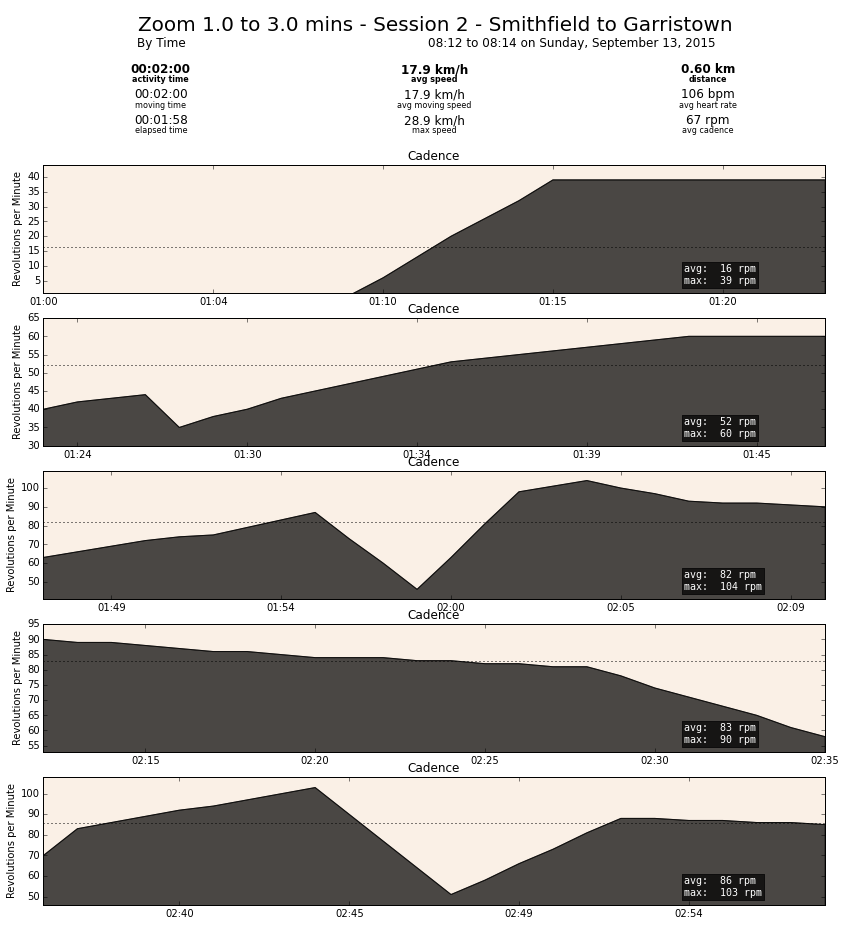

In [54]:
session_num = 2
column_name = 'cadence'
view_type = 'time'
start_value = 1.0
end_value = 3.0
divs = 5
session_detail_zoom(view_type, session_num, column_name, start_value, end_value, divs)

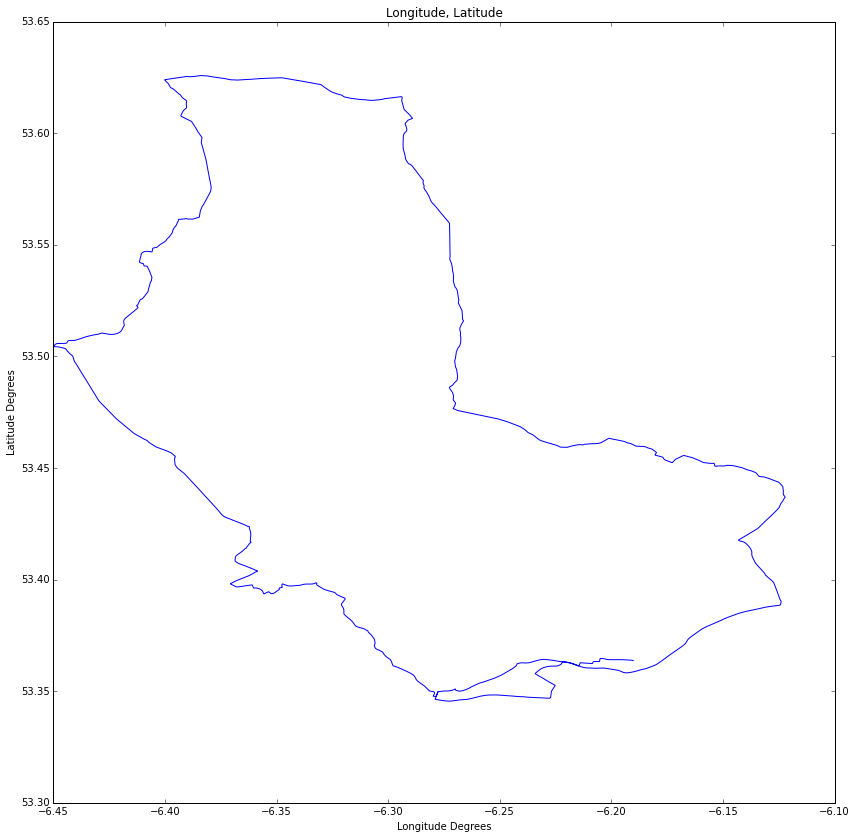

In [41]:
# new style method 2; use an axes array

fig2, axs2 = plt.subplots(1,1,  figsize=(14, 14))
axs2.set_title('Longitude, Latitude')
axs2.set_xlabel('Longitude Degrees')
axs2.set_ylabel('Latitude Degrees')
_ = axs2.plot(df.longitude, df.latitude)

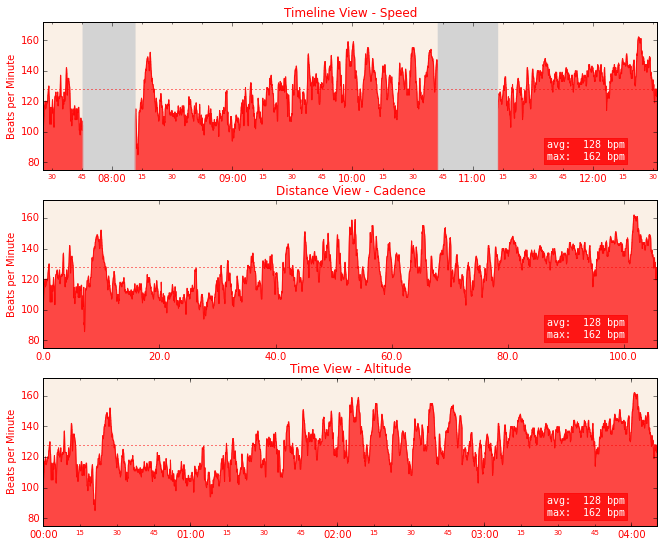

In [42]:
fig, axes = plt.subplots(nrows=3, ncols=1,  figsize=(11, 10))

#Speed over local time with breaks
#plot_control = get_plot_controls('heart_rate', activity_title = 'Timeline View - Heart Rate',)
plot_control = get_plot_controls('heart_rate', activity_title = 'Timeline View - Speed',activity_xlabel = '',)
_ = plot_timeline(df, plot_control, axes[0])

#Speed over distance
#plot_control = get_plot_controls('heart_rate', activity_title = 'Distance View - Heart Rate',)
plot_control = get_plot_controls('heart_rate', activity_title = 'Distance View - Cadence',activity_xlabel = '',)
_ = plot_distance(df_moving, plot_control, axes[1])

#Speed over activity time
#plot_control = get_plot_controls('heart_rate', activity_title = 'Time View - Heart Rate',)
plot_control = get_plot_controls('heart_rate', activity_title = 'Time View - Altitude',activity_xlabel = '',)
_ = plot_time(df_moving, plot_control, axes[2])


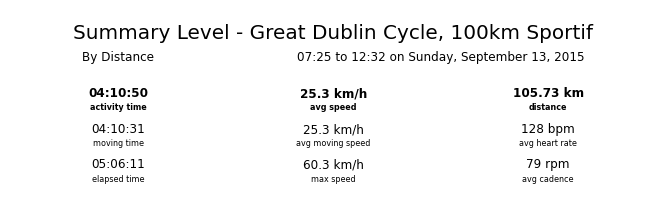

In [43]:
fig, axes = plt.subplots(nrows=1, ncols=1,  figsize=(11, 3.2))

create_header(axes, sum_metrics, "Summary Level - Great Dublin Cycle, 100km Sportif", "By Distance")

In [44]:
sum_metrics

{' max_heart_rate': 162,
 'activity_time': datetime.timedelta(0, 15051),
 'activity_time_str': '04:10:50',
 'avg_cadence': 79.0,
 'avg_cadence_str': '79 rpm',
 'avg_heart_rate': 128.0,
 'avg_heart_rate_str': '128 bpm',
 'avg_moving_speed_str': '25.3 km/h',
 'avg_speed': 25.28824818112923,
 'avg_speed_moving': 25.32021177316232,
 'avg_speed_str': '25.3 km/h',
 'break_time': datetime.timedelta(0, 3321),
 'break_time_str': '00:55:21',
 'distance': 105725.95093727112,
 'distance_str': '105.73 km',
 'elapsed_time': Timedelta('0 days 05:06:11'),
 'elapsed_time_str': '05:06:11',
 'end_hr_min_str': '12:32',
 'end_time': Timestamp('2015-09-13 12:32:02+0100', tz='Europe/Dublin'),
 'headline_time_str': '07:25 to 12:32 on Sunday, September 13, 2015',
 'max_cadence': 128,
 'max_speed': 60.309375000000017,
 'max_speed_str': '60.3 km/h',
 'moving_time': datetime.timedelta(0, 15032),
 'moving_time_str': '04:10:31',
 'non_moving_time': datetime.timedelta(0, 3340),
 'start_day_date_str': 'Sunday, Septem